$\textbf{Least squares intersection point and line fitting -- advanced.}$ Equation (2.4) shows how the intersection of two 2D
lines can be expressed as their cross product, assuming the lines are expressed as homogenous coordinates.

1. If you are given more than two lines and want to find a point $\tilde{x}$ that minimizes the sum of squared distances to
each line, $$\displaystyle D = \sum_{i}(\tilde{x} \cdot \tilde{l}_i)^2$$ how can you compute this quantity? (Hint: Write the dot product as
$\tilde{x}^T\tilde{l}_i$, and turn the squared quantity into a $\textit{quadratic form}$, $\tilde{x}^TA\tilde{x}$).

In [64]:
%cd /home/ubuntu/CV-Algs-Apps-2ED
import numpy as np
import matplotlib.pyplot as plt
from src.primitives.point import Point2D
from src.primitives_lists.points import Points2D
from src.primitives.line import Line2D
from src.primitives_lists.lines import Lines2D

/home/ubuntu/CV-Algs-Apps-2ED


A: [[125. -42.  11.]
 [-42. 165.  13.]
 [ 11.  13.   3.]]

U: [[-0.52961754 -0.83916845 -0.12369953]
 [ 0.8477894  -0.51894488 -0.10931304]
 [ 0.02753882 -0.16276526  0.98628043]]

S: [1.91659854e+02 1.01160606e+02 1.79540094e-01]

Vt: [[-0.52961754  0.8477894   0.02753882]
 [-0.83916845 -0.51894488 -0.16276526]
 [-0.12369953 -0.10931304  0.98628043]]

Last right singular vector of A: [-0.12369953 -0.10931304  0.98628043]

Solution point: Point2D([[-0.12]
 [-0.11]
 [ 0.99]])



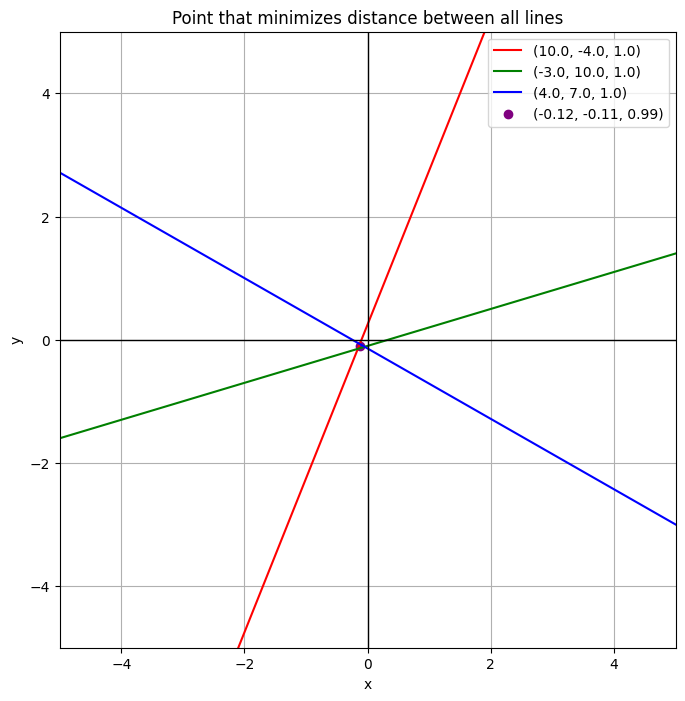

In [65]:
line1 = Line2D(coeffs=(10.0, -4.0, 1.0))
line2 = Line2D(coeffs=(-3.0, 10.0, 1.0))
line3 = Line2D(coeffs=(4.0, 7.0, 1.0))

lines = Lines2D([line1, line2, line3])
solution = lines.calculate_closest_point(verbose=True)

# Generate x values from -5 to 5 with 5 values
x_vals = np.linspace(-5, 5, 5)

# Calculate the corresponding y values for each line
y_vals_line1 = line1.get_point_y_from_x(x_vals)
y_vals_line2 = line2.get_point_y_from_x(x_vals)
y_vals_line3 = line3.get_point_y_from_x(x_vals)

# Plot the lines and solution point
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals_line1, label=f"({line1.a}, {line1.b}, {line1.c})", color="r")
plt.plot(x_vals, y_vals_line2, label=f"({line2.a}, {line2.b}, {line2.c})", color="g")
plt.plot(x_vals, y_vals_line3, label=f"({line3.a}, {line3.b}, {line3.c})", color="b")
plt.scatter(solution.x, solution.y, label=f"({solution.x}, {solution.y}, {solution.w})", color="purple")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Point that minimizes distance between all lines")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

2. To fit a line to a bunch of points, you can compute the $\textit{centroid}$ (mean) of the points as well as the $\textit{covariance matrix}$ of the points around this mean. Show that the line passing through the centroid along the major axis of the covariance ellipsoid (largest eigenvector) minimizes the sum of squared distances to the points.

centroid: [2. 2. 1.]

centered_points: [[-1. -1.  0.]
 [ 0.  0.  0.]
 [ 1.  1.  0.]]

cov_mat: [[0.66666667 0.66666667 0.        ]
 [0.66666667 0.66666667 0.        ]
 [0.         0.         0.        ]]

eigvals: [1.33333333 0.         0.        ]

eigvecs: [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

max_eigval_idx: 0

principal_direction: [0.70710678 0.70710678 0.        ]

dx, dy: 0.7071067811865475, 0.7071067811865475

normal_vector: [-0.70710678  0.70710678]

fit_line: Line2D([[-0.70710678]
 [ 0.70710678]
 [ 0.        ]])



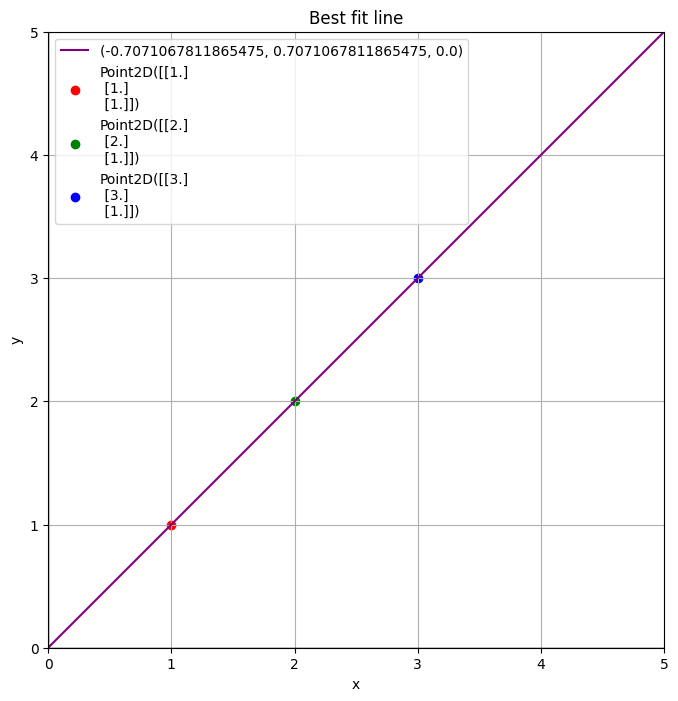

In [66]:
point1 = Point2D(1.0, 1.0, 1.0)
point2 = Point2D(2.0, 2.0, 1.0)
point3 = Point2D(3.0, 3.0, 1.0)

points2d = Points2D([point1, point2, point3])
fit_line: Line2D = points2d.calculate_fit_line(verbose=True)

x_vals = np.linspace(0, 5, 5)
y_vals = fit_line.get_point_y_from_x(x_vals)

# Plot the lines and solution point
plt.figure(figsize=(8, 8))
plt.plot(x_vals, y_vals, label=f"({fit_line.a}, {fit_line.b}, {fit_line.c})", color="purple")
plt.scatter(point1.x, point1.y, label=f"{point1}", color="r")
plt.scatter(point2.x, point2.y, label=f"{point2}", color="g")
plt.scatter(point3.x, point3.y, label=f"{point3}", color="b")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Best fit line")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

3. These two approaches are fundamentally different, even though projective duality tells us that points and lines are interchangeable. Why are these two algorithms so apparently different? Are they actually minimizing different objectives?

Fitting a point to multiple lines involves minimizing the homogenous dot product (algebraic distances) between the point and each line. The solution is the eigenvector corresponding to the smallest eigenvalue of A (the last right singular vector from SVD in our scenario). Fitting a line to multiple points involves minimizing the orthogonal distance (Euclidean distance) from each point to the line. The solution is the eigenvector corresponding to the largest eigenvalue of the covariance matrix of the centered points.